# COMP550 Final Project: 
## Comparing Extractive Text Summarization Methods Across Languages

Nakiya Noorbhai, Kira Noël, and Luca Garnier-Landurie

## Datasets

We use the datasets cnn_dailymail (https://huggingface.co/datasets/cnn_dailymail) and mlsum (https://huggingface.co/datasets/mlsum) from huggingface. We will use the training split as our dev set and the validation and test sets as our test set.

In [1]:
from datasets import load_dataset, concatenate_datasets

# English
en_dev = load_dataset('cnn_dailymail', '3.0.0', split='train')
en_test = concatenate_datasets([load_dataset('cnn_dailymail', '3.0.0', split='validation'), load_dataset('cnn_dailymail', '3.0.0', split='test')])

# German
de_dev = load_dataset('mlsum', 'de', split='train')
de_test = concatenate_datasets([load_dataset('mlsum', 'de', split='validation'), load_dataset('mlsum', 'de', split='test')])

# Spanish
es_dev = load_dataset('mlsum', 'es', split='train')
es_test = concatenate_datasets([load_dataset('mlsum', 'es', split='validation'), load_dataset('mlsum', 'es', split='test')])

# French
fr_dev = load_dataset('mlsum', 'fr', split='train')
fr_test = concatenate_datasets([load_dataset('mlsum', 'fr', split='validation'), load_dataset('mlsum', 'fr', split='test')])

# Russian
ru_dev = load_dataset('mlsum', 'ru', split='train')
ru_test = concatenate_datasets([load_dataset('mlsum', 'ru', split='validation'), load_dataset('mlsum', 'ru', split='test')])

# Turkish
tu_dev = load_dataset('mlsum', 'tu', split='train')
tu_test = concatenate_datasets([load_dataset('mlsum', 'tu', split='validation'), load_dataset('mlsum', 'tu', split='test')])

Reusing dataset cnn_dailymail (/home/ke-noel/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/3cb851bf7cf5826e45d49db2863f627cba583cbc32342df7349dfe6c38060234)
Reusing dataset cnn_dailymail (/home/ke-noel/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/3cb851bf7cf5826e45d49db2863f627cba583cbc32342df7349dfe6c38060234)
Reusing dataset cnn_dailymail (/home/ke-noel/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/3cb851bf7cf5826e45d49db2863f627cba583cbc32342df7349dfe6c38060234)
Reusing dataset mlsum (/home/ke-noel/.cache/huggingface/datasets/mlsum/de/1.0.0/77f23eb185781f439927ac2569ab1da1083195d8b2dab2b2f6bbe52feb600688)
Reusing dataset mlsum (/home/ke-noel/.cache/huggingface/datasets/mlsum/de/1.0.0/77f23eb185781f439927ac2569ab1da1083195d8b2dab2b2f6bbe52feb600688)
Reusing dataset mlsum (/home/ke-noel/.cache/huggingface/datasets/mlsum/de/1.0.0/77f23eb185781f439927ac2569ab1da1083195d8b2dab2b2f6bbe52feb600688)
Reusing dataset mlsum (/home/ke-noel/.cache/huggingface/datasets/ml

In [2]:
dev_sets = (en_dev, de_dev, es_dev, fr_dev, ru_dev, tu_dev)
test_sets = (en_test, de_test, es_test, fr_test, ru_test, tu_test)
languages = ('english', 'german', 'spanish', 'french', 'russian', 'turkish')

## Data Exploration

In [17]:
def print_stats(language, dev, test):
    '''
    Get the average summary and article lengths, and the average ratio.
    Also collect dataset sizes.
    '''
    SAMPLES = 5000

    summary_wcs_dev = []
    article_wcs_dev = []
    summary_scs_dev = []
    article_scs_dev = []
    summary_article_wc_ratios_dev = []
    count = 0
    for e in dev:
        if count >= SAMPLES:
            break
        count += 1
        try:
            article_wcs_dev.append(len(e['text'].split()))
            summary_wcs_dev.append(len(e['summary'].split()))
            article_scs_dev.append(len(e['text'].split('.')))
            summary_scs_dev.append(len(e['summary'].split('.')))
        except:
            article_wcs_dev.append(len(e['article'].split()))
            summary_wcs_dev.append(len(e['highlights'].split()))
            article_scs_dev.append(len(e['article'].split('.')))
            summary_scs_dev.append(len(e['highlights'].split('.')))
        summary_article_wc_ratios_dev.append(article_wcs_dev[-1] / summary_wcs_dev[-1])
    len_dev = len(summary_wcs_dev)
    avg_summary_wc_dev = sum(summary_wcs_dev) / len_dev
    avg_article_wc_dev = sum(article_wcs_dev) / len_dev
    avg_summary_sc_dev = sum(summary_scs_dev) / len_dev
    avg_article_sc_dev = sum(article_scs_dev) / len_dev
    avg_ratio_dev = sum(summary_article_wc_ratios_dev) / len_dev
    
    summary_wcs_test = []
    article_wcs_test = []
    summary_scs_test = []
    article_scs_test = []
    summary_article_wc_ratios_test = []
    count = 0
    for e in test:
        if count >= SAMPLES:
            break
        count += 1
        try:
            article_wcs_test.append(len(e['text'].split()))
            summary_wcs_test.append(len(e['summary'].split()))
            article_scs_test.append(len(e['text'].split('.')))
            summary_scs_test.append(len(e['summary'].split('.')))
        except:
            article_wcs_test.append(len(e['article'].split()))
            summary_wcs_test.append(len(e['highlights'].split()))
            article_scs_test.append(len(e['article'].split('.')))
            summary_scs_test.append(len(e['highlights'].split('.')))
        summary_article_wc_ratios_test.append(article_wcs_test[-1] / summary_wcs_test[-1])
    len_test = len(summary_wcs_test)
    avg_summary_wc_test = sum(summary_wcs_test) / len_test
    avg_article_wc_test = sum(article_wcs_test) / len_test
    avg_summary_sc_test = sum(summary_scs_test) / len_test
    avg_article_sc_test = sum(article_scs_test) / len_test
    avg_ratio_test = sum(summary_article_wc_ratios_test) / len_test

    print('--- ' + language + ' ---')
    print('Dev set - num entries: %d, avg summary wc: %.2f, avg article wc: %.2f, avg ratio: %.2f, avg summary sc: %.2f, avg article sc: %.2f'
            %(len_dev, avg_summary_wc_dev, avg_article_wc_dev, avg_ratio_dev, avg_summary_sc_dev, avg_article_sc_dev))
    print('Test set - num entries: %d, avg summary wc: %.2f, avg article wc: %.2f, avg ratio: %.2f, avg summary sc: %.2f, avg article sc: %.2f'
            %(len_test, avg_summary_wc_test, avg_article_wc_test, avg_ratio_test, avg_summary_sc_test, avg_article_sc_test))
    print()
    return (language, len_dev, avg_summary_wc_dev, avg_article_wc_dev, avg_ratio_dev, avg_summary_sc_dev, avg_article_sc_dev, 
            len_test, avg_summary_wc_test, avg_article_wc_test, avg_ratio_test, avg_summary_sc_test, avg_article_sc_test)

stats = []
for l, dev, test in zip(languages, dev_sets, test_sets):
    stats.append(print_stats(l, dev, test))

--- english ---
Dev set - num entries: 5000, avg summary wc: 45.60, avg article wc: 656.44, avg ratio: 14.65, avg summary sc: 4.85, avg article sc: 38.78
Test set - num entries: 5000, avg summary wc: 54.18, avg article wc: 670.72, avg ratio: 13.90, avg summary sc: 4.85, avg article sc: 35.96

--- german ---
Dev set - num entries: 5000, avg summary wc: 25.87, avg article wc: 516.23, avg ratio: 21.56, avg summary sc: 2.86, avg article sc: 32.29
Test set - num entries: 5000, avg summary wc: 23.11, avg article wc: 549.22, avg ratio: 25.17, avg summary sc: 2.86, avg article sc: 34.01

--- spanish ---
Dev set - num entries: 5000, avg summary wc: 17.33, avg article wc: 683.11, avg ratio: 41.98, avg summary sc: 1.13, avg article sc: 32.94
Test set - num entries: 5000, avg summary wc: 21.55, avg article wc: 741.88, avg ratio: 36.14, avg summary sc: 1.20, avg article sc: 34.23

--- french ---
Dev set - num entries: 5000, avg summary wc: 24.01, avg article wc: 494.56, avg ratio: 24.28, avg summar

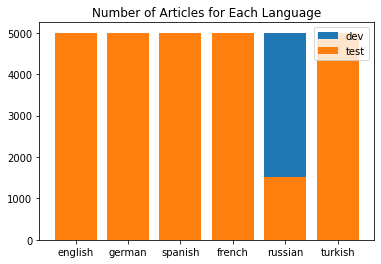

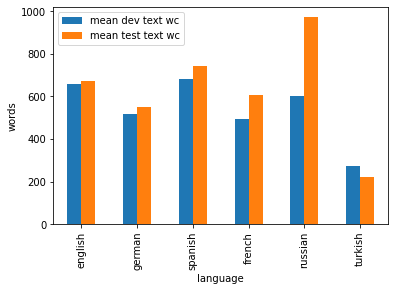

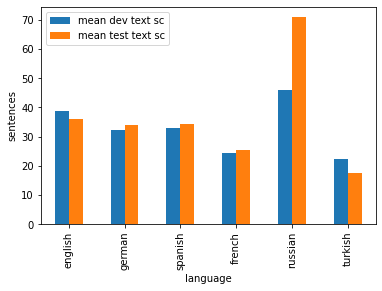

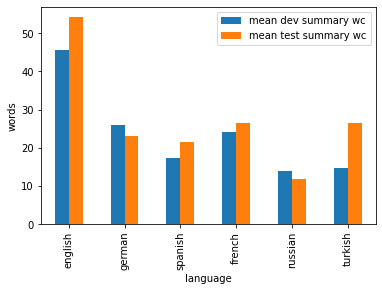

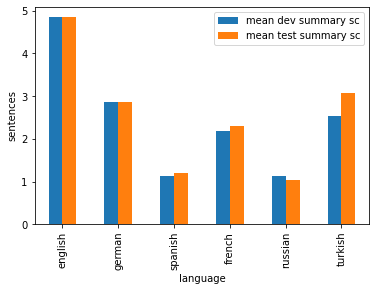

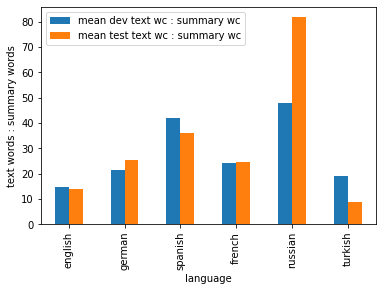

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

columns = ['language', 'number of dev articles', 'mean dev summary wc', 'mean dev text wc', 'mean dev text wc : summary wc', 'mean dev summary sc', 'mean dev text sc',
           'number of test articles', 'mean test summary wc', 'mean test text wc', 'mean test text wc : summary wc', 'mean test summary sc', 'mean test text sc']
df = pd.DataFrame(stats, columns=columns)

# Plot the relative sizes
len_dev = df['number of dev articles'].tolist()
len_test = df['number of test articles'].tolist()
plt.figure()
plt.title('Number of Articles for Each Language')
plt.bar(languages, len_dev, label='dev')
plt.bar(languages, len_test, label='test')
plt.legend(loc='upper right')
plt.show()

ax = df.plot(x='language', y=['mean dev text wc', 'mean test text wc'], kind='bar')
ax.set_ylabel('words')
plt.show()

ax = df.plot(x='language', y=['mean dev text sc', 'mean test text sc'], kind='bar')
ax.set_ylabel('sentences')
plt.show()

ax = df.plot(x='language', y=['mean dev summary wc', 'mean test summary wc'], kind='bar')
ax.set_ylabel('words')
plt.show()

ax = df.plot(x='language', y=['mean dev summary sc', 'mean test summary sc'], kind='bar')
ax.set_ylabel('sentences')
plt.show()

ax = df.plot(x='language', y=['mean dev text wc : summary wc', 'mean test text wc : summary wc'], kind='bar')
ax.set_ylabel('text words : summary words')
plt.show()

## Method

### Metrics

In [3]:
from rouge import Rouge
rouge = Rouge()

### Models

In [4]:
import numpy as np
from nltk.corpus import stopwords
from summarizers.luhn import luhn_summarize
from summarizers.textrank import textrank_summarize, w2v_textrank_summarize

In [6]:
def run_experiment(summarizer, dataset, language, key_name, save_dict=None, max_samples=5000, stopwords=None, arg=None):
    """
    input:
        summarizer: model to summarize the text
        preprocess: preprocessing 
        dataset: data to summarize
        language: language name of dataset
        key_name: experiment name (ex. 'luhn_no_stopwords'). If save_dict is provided, the key the results will be saved under
        save: if None, do not save. Otherwise, treat as dictionary and save results to save_dict[key_name]
        max_samples: number of samples to summarize
        stopwords: stopwords to use with the summarizer
        arg: extra argument for summarizer
    """
    scores = []
    count = 0
    text = 'article' if language == 'english' else 'text'
    summary = 'highlights' if language == 'english' else 'summary'
    for e in dataset:
        hypothesis = summarizer(e[text], e[summary], stopwords, arg)
        reference = e[summary]
        if len(hypothesis) > 0:
            try:
                scores.append(rouge.get_scores(hypothesis, reference))
                count += 1
            except:
                1
        if count >= max_samples:
            break

    # Compute overall statistics
    r1_f1s = np.array([s[0]['rouge-1']['f'] for s in scores])
    r2_f1s = np.array([s[0]['rouge-2']['f'] for s in scores])

    stats = {
        'r1-f1': {'mean': np.mean(r1_f1s), 'std': np.std(r1_f1s)},
        'r2-f1': {'mean': np.mean(r2_f1s), 'std': np.std(r2_f1s)},
    }
    print(f'{key_name}: {stats}')

    if save_dict is not None:
        save_dict[key_name] = stats

In [7]:
### Randomly select sentences from the original text. Create a baseline. ###
import random 
from nltk.tokenize import sent_tokenize

random.seed(42)

def random_summarize(document, reference, arg1, arg2):
    sum_sentences = len(sent_tokenize(reference))
    sentences = sent_tokenize(document)
    if sum_sentences > len(sentences):
        return ''
    summary = ' '.join(random.sample(sentences, sum_sentences))
    return summary

## Experiment

In [8]:
english_rouge_scores = {}
french_rouge_scores = {}
german_rouge_scores = {}
russian_rouge_scores = {}
spanish_rouge_scores = {}
turkish_rouge_scores = {}

In [9]:
english_rouge_test_scores = {}
french_rouge_test_scores = {}
german_rouge_test_scores = {}
russian_rouge_test_scores = {}
spanish_rouge_test_scores = {}
turkish_rouge_test_scores = {}

### English

#### Baseline

In [10]:
# Dev set
run_experiment(
    random_summarize, 
    dev_sets[languages.index('english')], 
    'english', 
    'baseline',
    save_dict=english_rouge_scores,
)

baseline: {'r1-f1': {'mean': 0.2026753499362981, 'std': 0.09258414117331115}, 'r2-f1': {'mean': 0.04842959602666716, 'std': 0.06642523314029906}}


In [12]:
# Test set
run_experiment(
    random_summarize, 
    test_sets[languages.index('english')], 
    'english', 
    'baseline',
    save_dict=english_rouge_test_scores,
)

baseline: {'r1-f1': {'mean': 0.24616344513464036, 'std': 0.11444976473747671}, 'r2-f1': {'mean': 0.07216613168400884, 'std': 0.0854375625866011}}


#### Luhn Summarizer

##### With Stopwords Removed

In [11]:
# Dev set 
for th in [2**n for n in range(7)] + [100]:
    run_experiment(
        luhn_summarize, 
        dev_sets[languages.index('english')], 
        'english', 
        f'luhn_sw_th_{th}%', 
        stopwords=stopwords.words('english'), 
        arg=0.01*th,
        save_dict=english_rouge_scores,
    )

luhn_sw_th_1%: {'r1-f1': {'mean': 0.24947056492197517, 'std': 0.09945243131050825}, 'r2-f1': {'mean': 0.0773090546951339, 'std': 0.07752106049943629}}
luhn_sw_th_2%: {'r1-f1': {'mean': 0.2502881519977037, 'std': 0.09511876705655922}, 'r2-f1': {'mean': 0.0766281012568074, 'std': 0.07391902234112994}}
luhn_sw_th_4%: {'r1-f1': {'mean': 0.2539358002865998, 'std': 0.09407842828228145}, 'r2-f1': {'mean': 0.07784448572727357, 'std': 0.07320645367563848}}
luhn_sw_th_8%: {'r1-f1': {'mean': 0.25528465310132664, 'std': 0.09444971138173829}, 'r2-f1': {'mean': 0.07879336083350927, 'std': 0.07329042482167805}}
luhn_sw_th_16%: {'r1-f1': {'mean': 0.25658686624332877, 'std': 0.09531190026882087}, 'r2-f1': {'mean': 0.08076991588833773, 'std': 0.0731730964928896}}
luhn_sw_th_32%: {'r1-f1': {'mean': 0.25926388620134355, 'std': 0.09750515612492006}, 'r2-f1': {'mean': 0.08307864873030837, 'std': 0.07494158143490483}}
luhn_sw_th_64%: {'r1-f1': {'mean': 0.24106461096033005, 'std': 0.09565587148721477}, 'r2-f1

In [14]:
# Test set
for th in [2**n for n in range(7)] + [100]:
    run_experiment(
        luhn_summarize, 
        test_sets[languages.index('english')], 
        'english', 
        f'luhn_sw_th_{th}%', 
        stopwords=stopwords.words('english'), 
        arg=0.01*th,
        save_dict=english_rouge_test_scores,
    )

luhn_sw_th_1%: {'r1-f1': {'mean': 0.30794531159112787, 'std': 0.12073661593517415}, 'r2-f1': {'mean': 0.11275602887583382, 'std': 0.09761987915984466}}
luhn_sw_th_2%: {'r1-f1': {'mean': 0.3077105201046729, 'std': 0.11855470434221684}, 'r2-f1': {'mean': 0.1112954255983666, 'std': 0.09659497490995109}}
luhn_sw_th_4%: {'r1-f1': {'mean': 0.3140228712099471, 'std': 0.11785003468716578}, 'r2-f1': {'mean': 0.11515268382652498, 'std': 0.09730027322135058}}
luhn_sw_th_8%: {'r1-f1': {'mean': 0.31905468450282354, 'std': 0.1179199639025664}, 'r2-f1': {'mean': 0.1185653927778191, 'std': 0.09725684644964237}}
luhn_sw_th_16%: {'r1-f1': {'mean': 0.3280685986379814, 'std': 0.12322701538701708}, 'r2-f1': {'mean': 0.12659220795346346, 'std': 0.10299542408004012}}
luhn_sw_th_32%: {'r1-f1': {'mean': 0.32717494685741116, 'std': 0.12245682448996362}, 'r2-f1': {'mean': 0.12702347809323247, 'std': 0.10481720147134191}}
luhn_sw_th_64%: {'r1-f1': {'mean': 0.30028476462895426, 'std': 0.12079999123956538}, 'r2-f1'

##### Without Removing Stopwords

In [81]:
# Dev set
for th in [2**n for n in range(7)] + [100]:
    run_experiment(
        luhn_summarize, 
        dev_sets[languages.index('english')], 
        'english', 
        f'luhn_nosw_th_{th}%',
        arg=0.01*th,
        save_dict=english_rouge_scores,
    )

luhn_nosw_th_1%: {'r1-f1': {'mean': 0.21746235165458466, 'std': 0.08978644747242888}, 'r2-f1': {'mean': 0.058863712543075715, 'std': 0.06607548722885678}}
luhn_nosw_th_2%: {'r1-f1': {'mean': 0.21840444031146017, 'std': 0.08879718090895289}, 'r2-f1': {'mean': 0.05970509556536031, 'std': 0.06560132454792302}}
luhn_nosw_th_4%: {'r1-f1': {'mean': 0.2217944916285753, 'std': 0.08852350557863924}, 'r2-f1': {'mean': 0.06103890944638688, 'std': 0.06533468768638709}}
luhn_nosw_th_8%: {'r1-f1': {'mean': 0.22825999006648504, 'std': 0.08918378293162026}, 'r2-f1': {'mean': 0.0643523785696358, 'std': 0.06654194951721842}}
luhn_nosw_th_16%: {'r1-f1': {'mean': 0.23274943920351993, 'std': 0.09120634299678815}, 'r2-f1': {'mean': 0.06649202016777855, 'std': 0.06775543435983461}}
luhn_nosw_th_32%: {'r1-f1': {'mean': 0.23403724219050792, 'std': 0.09128105129393249}, 'r2-f1': {'mean': 0.0678790535909055, 'std': 0.06815265279862215}}
luhn_nosw_th_64%: {'r1-f1': {'mean': 0.23336456811094394, 'std': 0.092941440

In [91]:
# Test set
for th in [2**n for n in range(7)] + [100]:
    run_experiment(
        luhn_summarize, 
        test_sets[languages.index('english')], 
        'english', 
        f'luhn_nosw_th_{th}%', 
        arg=0.01*th,
        save_dict=english_rouge_test_scores,
    )

luhn_nosw_th_1%: {'r1-f1': {'mean': 0.263818209836583, 'std': 0.11058074731255677}, 'r2-f1': {'mean': 0.0842467127918752, 'std': 0.08547215417547323}}
luhn_nosw_th_2%: {'r1-f1': {'mean': 0.26310763533008674, 'std': 0.10945476986429027}, 'r2-f1': {'mean': 0.08417313429057856, 'std': 0.08421789220477899}}
luhn_nosw_th_4%: {'r1-f1': {'mean': 0.2687610879916495, 'std': 0.1112178823809855}, 'r2-f1': {'mean': 0.08784214614635409, 'std': 0.0878150393928701}}
luhn_nosw_th_8%: {'r1-f1': {'mean': 0.2785835375114418, 'std': 0.11386005168808276}, 'r2-f1': {'mean': 0.092896235049192, 'std': 0.08973848505195099}}
luhn_nosw_th_16%: {'r1-f1': {'mean': 0.2895010019317846, 'std': 0.11668263918404573}, 'r2-f1': {'mean': 0.09995006762397061, 'std': 0.09344752246210472}}
luhn_nosw_th_32%: {'r1-f1': {'mean': 0.29680824900749075, 'std': 0.1207534178091944}, 'r2-f1': {'mean': 0.1061658075009549, 'std': 0.09816057297175286}}
luhn_nosw_th_64%: {'r1-f1': {'mean': 0.28704642660561824, 'std': 0.11640665348793613},

#### TextRank Summarizer (Unigram Overlap)

##### With Stopwords Removed

In [15]:
# Dev set
run_experiment(
    textrank_summarize, 
    dev_sets[languages.index('english')], 
    'english', 
    'textrank_sw_uni', 
    stopwords=stopwords.words('english'), 
    arg=True,  # set input to lowercase 
    save_dict=english_rouge_scores,
)

textrank_sw_uni: {'r1-f1': {'mean': 0.24063952978773945, 'std': 0.08983469716578857}, 'r2-f1': {'mean': 0.07153641943589346, 'std': 0.06815386464408062}}


In [16]:
# Test Set
run_experiment(
    textrank_summarize, 
    test_sets[languages.index('english')], 
    'english', 
    'textrank_sw_uni', 
    stopwords=stopwords.words('english'), 
    arg=True,  # set input to lowercase  
    save_dict=english_rouge_test_scores,
)

textrank_sw_uni: {'r1-f1': {'mean': 0.30110246180322275, 'std': 0.11922506767421172}, 'r2-f1': {'mean': 0.1087866723641293, 'std': 0.09626333748447774}}


##### Without Removing Stopwords

In [17]:
# Dev set
run_experiment(
    textrank_summarize, 
    dev_sets[languages.index('english')], 
    'english', 
    'textrank_nosw_uni', 
    arg=True,  # set input to lowercase
    save_dict=english_rouge_scores,
)

textrank_nosw_uni: {'r1-f1': {'mean': 0.21858672860343004, 'std': 0.08736895376071378}, 'r2-f1': {'mean': 0.05851489656307806, 'std': 0.06434556061291041}}


In [18]:
# Test Set
run_experiment(
    textrank_summarize, 
    test_sets[languages.index('english')], 
    'english', 
    'textrank_nosw_uni', 
    arg=True,  # set input to lowercase
    save_dict=english_rouge_test_scores,
)

textrank_nosw_uni: {'r1-f1': {'mean': 0.2669497069617294, 'std': 0.11388699442474118}, 'r2-f1': {'mean': 0.08678918727140081, 'std': 0.08854603084268634}}


#### TextRank Summarizer (Cosine Similarity)

##### With Stopwords Removed

In [ ]:
# Dev set
run_experiment(
    w2v_textrank_summarize, 
    dev_sets[languages.index('english')], 
    'english', 
    'textrank_sw_cos', 
    stopwords=stopwords.words('english'), 
    arg=True,  # set input to lowercase
    save_dict=english_rouge_scores,
)

textrank_sw_cos: {'r1-f1': {'mean': 0.19660366616086689, 'std': 0.09283313287021201}, 'r2-f1': {'mean': 0.04589284681659213, 'std': 0.06468773489106722}}


In [ ]:
# Test set
run_experiment(
    w2v_textrank_summarize, 
    test_sets[languages.index('english')], 
    'english', 
    'textrank_sw_cos', 
    stopwords=stopwords.words('english'), 
    arg=True,  # set input to lowercase
    save_dict=english_rouge_test_scores,
)

textrank_sw_cos: {'r1-f1': {'mean': 0.2399013293732315, 'std': 0.11283353198846671}, 'r2-f1': {'mean': 0.06738638276575527, 'std': 0.08157844895278123}}


##### Without Removing Stopwords

In [20]:
# Dev set
run_experiment(
    w2v_textrank_summarize, 
    dev_sets[languages.index('english')], 
    'english', 
    'textrank_nosw_cos', 
    arg=True,  # set input to lowercase
    save_dict=english_rouge_scores,
)

textrank_nosw_cos: {'r1-f1': {'mean': 0.1998856975964823, 'std': 0.09638328936548851}, 'r2-f1': {'mean': 0.048757865434958615, 'std': 0.06898951101152674}}


In [37]:
# Test Set
run_experiment(
    w2v_textrank_summarize, 
    test_sets[languages.index('english')], 
    'english', 
    'textrank_nosw_cos', 
    arg=True,  # set input to lowercase
    save_dict=english_rouge_test_scores,
)

textrank_nosw_cos: {'r1-f1': {'mean': 0.2391540791510937, 'std': 0.11448503350230828}, 'r2-f1': {'mean': 0.06807263409034786, 'std': 0.08219630037797088}}


### French

#### Baseline

In [22]:
# Dev set
run_experiment(
    random_summarize, 
    dev_sets[languages.index('french')], 
    'french', 
    'baseline',
    save_dict=french_rouge_scores,
)

baseline: {'r1-f1': {'mean': 0.14237860836469127, 'std': 0.1574058130886369}, 'r2-f1': {'mean': 0.04617442115522943, 'std': 0.1479517652996283}}


In [23]:
# Test set
run_experiment(
    random_summarize, 
    test_sets[languages.index('french')], 
    'french', 
    'baseline',
    save_dict=french_rouge_test_scores,
)

baseline: {'r1-f1': {'mean': 0.1365800724418462, 'std': 0.10283096181520622}, 'r2-f1': {'mean': 0.026778799320980533, 'std': 0.07899010622194602}}


#### Luhn Summarizer

##### With Stopwords Removed

In [24]:
# Dev set
for th in [2**n for n in range(7)] + [100]:
    run_experiment(
        luhn_summarize, 
        dev_sets[languages.index('french')], 
        'french', 
        f'luhn_sw_th_{th}%', 
        stopwords=stopwords.words('french'), 
        arg=0.01*th,
        save_dict=french_rouge_scores,
    )

luhn_sw_th_1%: {'r1-f1': {'mean': 0.2407810220037994, 'std': 0.2535898517112369}, 'r2-f1': {'mean': 0.13331301237476806, 'std': 0.2669010438997519}}
luhn_sw_th_2%: {'r1-f1': {'mean': 0.23407374182625282, 'std': 0.2412078598692163}, 'r2-f1': {'mean': 0.12393624373592017, 'std': 0.2540064276267402}}
luhn_sw_th_4%: {'r1-f1': {'mean': 0.2467241391741314, 'std': 0.24738082907405984}, 'r2-f1': {'mean': 0.13481914282208785, 'std': 0.2619258367891682}}
luhn_sw_th_8%: {'r1-f1': {'mean': 0.2597282131230186, 'std': 0.25646024841022974}, 'r2-f1': {'mean': 0.1493745988654035, 'std': 0.27129479760838693}}
luhn_sw_th_16%: {'r1-f1': {'mean': 0.2566788739236805, 'std': 0.258805123482623}, 'r2-f1': {'mean': 0.14785893287509458, 'std': 0.27406218444110236}}
luhn_sw_th_32%: {'r1-f1': {'mean': 0.28658899077147915, 'std': 0.27825817578290196}, 'r2-f1': {'mean': 0.18035920742044906, 'std': 0.29756469477660974}}
luhn_sw_th_64%: {'r1-f1': {'mean': 0.21450938944138398, 'std': 0.21406699954405123}, 'r2-f1': {'me

In [25]:
# Test Set
for th in [2**n for n in range(7)] + [100]:
    run_experiment(
        luhn_summarize, 
        test_sets[languages.index('french')], 
        'french', 
        f'luhn_sw_th_{th}%', 
        stopwords=stopwords.words('french'), 
        arg=0.01*th,
        save_dict=french_rouge_test_scores,
    )

luhn_sw_th_1%: {'r1-f1': {'mean': 0.16707741077750637, 'std': 0.10479987163391499}, 'r2-f1': {'mean': 0.03875828357339005, 'std': 0.08410782776226901}}
luhn_sw_th_2%: {'r1-f1': {'mean': 0.1717147733974834, 'std': 0.10327003918616193}, 'r2-f1': {'mean': 0.04002529795131815, 'std': 0.08396688265933963}}
luhn_sw_th_4%: {'r1-f1': {'mean': 0.18105840190609496, 'std': 0.10685141016394038}, 'r2-f1': {'mean': 0.04730668963488731, 'std': 0.0899071646429997}}
luhn_sw_th_8%: {'r1-f1': {'mean': 0.18739922014893945, 'std': 0.11316316762608844}, 'r2-f1': {'mean': 0.05218686705466928, 'std': 0.09857789678848689}}
luhn_sw_th_16%: {'r1-f1': {'mean': 0.1859913311566535, 'std': 0.11184270322848859}, 'r2-f1': {'mean': 0.05298935076981706, 'std': 0.09604166354670939}}
luhn_sw_th_32%: {'r1-f1': {'mean': 0.19346024855529653, 'std': 0.11937447745702259}, 'r2-f1': {'mean': 0.06039304684645272, 'std': 0.10533798508560088}}
luhn_sw_th_64%: {'r1-f1': {'mean': 0.1748014639821386, 'std': 0.10299804889721248}, 'r2-f

##### Without Removing Stopwords

In [26]:
# Dev set
for th in [2**n for n in range(7)] + [100]:
    run_experiment(
        luhn_summarize, 
        dev_sets[languages.index('french')], 
        'french', 
        f'luhn_nosw_th_{th}%', 
        arg=0.01*th,
        save_dict=french_rouge_scores,
    )

luhn_nosw_th_1%: {'r1-f1': {'mean': 0.19788578207172092, 'std': 0.20252535773703162}, 'r2-f1': {'mean': 0.08855521622708724, 'std': 0.21063764414378572}}
luhn_nosw_th_2%: {'r1-f1': {'mean': 0.19094842814232685, 'std': 0.18670176599354826}, 'r2-f1': {'mean': 0.0778696534807792, 'std': 0.19274975707896544}}
luhn_nosw_th_4%: {'r1-f1': {'mean': 0.19379230555527732, 'std': 0.1850048942386862}, 'r2-f1': {'mean': 0.07909885671638517, 'std': 0.19057620510359932}}
luhn_nosw_th_8%: {'r1-f1': {'mean': 0.204073409885723, 'std': 0.19914458439932084}, 'r2-f1': {'mean': 0.089528357703699, 'std': 0.20659733382867393}}
luhn_nosw_th_16%: {'r1-f1': {'mean': 0.22166420446309812, 'std': 0.21811542784186363}, 'r2-f1': {'mean': 0.10809866650502972, 'std': 0.22827428800992908}}
luhn_nosw_th_32%: {'r1-f1': {'mean': 0.2567850614848667, 'std': 0.25644524447921385}, 'r2-f1': {'mean': 0.14780537533510518, 'std': 0.2730012080769823}}
luhn_nosw_th_64%: {'r1-f1': {'mean': 0.20747548285724268, 'std': 0.203658390067460

In [27]:
# Test Set
for th in [2**n for n in range(7)] + [100]:
    run_experiment(
        luhn_summarize, 
        test_sets[languages.index('french')], 
        'french', 
        f'luhn_nosw_th_{th}%', 
        arg=0.01*th,
        save_dict=french_rouge_test_scores,
    )

luhn_nosw_th_1%: {'r1-f1': {'mean': 0.1677937380647865, 'std': 0.10067795667398637}, 'r2-f1': {'mean': 0.041733690469504446, 'std': 0.08887361048963568}}
luhn_nosw_th_2%: {'r1-f1': {'mean': 0.17001601348539158, 'std': 0.09998240310070616}, 'r2-f1': {'mean': 0.0409362244468496, 'std': 0.08723159993445113}}
luhn_nosw_th_4%: {'r1-f1': {'mean': 0.16910861768737814, 'std': 0.09596990972165588}, 'r2-f1': {'mean': 0.03853979191698021, 'std': 0.08184574194632387}}
luhn_nosw_th_8%: {'r1-f1': {'mean': 0.17323703881819183, 'std': 0.09837697297233855}, 'r2-f1': {'mean': 0.040863504395800214, 'std': 0.08439717617894579}}
luhn_nosw_th_16%: {'r1-f1': {'mean': 0.17817241364715672, 'std': 0.10257117668209757}, 'r2-f1': {'mean': 0.045437488810507506, 'std': 0.08988499542771032}}
luhn_nosw_th_32%: {'r1-f1': {'mean': 0.1801519582169286, 'std': 0.1082670486534999}, 'r2-f1': {'mean': 0.04873929805060384, 'std': 0.09520416222483986}}
luhn_nosw_th_64%: {'r1-f1': {'mean': 0.17393724692577425, 'std': 0.10144565

#### TextRank Summarizer (Unigram Overlap)

##### With Stopwords Removed

In [28]:
# Dev set
run_experiment(
    textrank_summarize, 
    dev_sets[languages.index('french')], 
    'french', 
    'textrank_sw_uni', 
    stopwords=stopwords.words('french'), 
    arg=True,  # set input to lowercase
    save_dict=french_rouge_scores,
)

textrank_sw_uni: {'r1-f1': {'mean': 0.2091303645294268, 'std': 0.20718624905067695}, 'r2-f1': {'mean': 0.09714906134477432, 'std': 0.21421142080900615}}


In [29]:
# Test Set
run_experiment(
    textrank_summarize, 
    test_sets[languages.index('french')], 
    'french', 
    'textrank_sw_uni', 
    stopwords=stopwords.words('french'), 
    arg=True,  # set input to lowercase
    save_dict=french_rouge_test_scores,
)

textrank_sw_uni: {'r1-f1': {'mean': 0.17183518890501853, 'std': 0.09856253626168489}, 'r2-f1': {'mean': 0.041341025539174264, 'std': 0.08301569282130389}}


##### Without Removing Stopwords

In [30]:
# Dev set
run_experiment(
    textrank_summarize, 
    dev_sets[languages.index('french')], 
    'french', 
    'textrank_nosw_uni', 
    arg=True,  # set input to lowercase
    save_dict=french_rouge_scores,
)

textrank_nosw_uni: {'r1-f1': {'mean': 0.185033217269952, 'std': 0.17297535407919978}, 'r2-f1': {'mean': 0.06908771046052996, 'std': 0.1763081095725379}}


In [31]:
# Test Set
run_experiment(
    textrank_summarize, 
    test_sets[languages.index('french')], 
    'french', 
    'textrank_nosw_uni', 
    arg=True,  # set input to lowercase
    save_dict=french_rouge_test_scores,
)

textrank_nosw_uni: {'r1-f1': {'mean': 0.16601390358010293, 'std': 0.09114222739442775}, 'r2-f1': {'mean': 0.03516293235879054, 'std': 0.07611168146751415}}


#### TextRank Summarizer (Cosine Similarity)

##### With Stopwords Removed

In [32]:
run_experiment(
    w2v_textrank_summarize, 
    dev_sets[languages.index('french')], 
    'french', 
    'textrank_sw_cos', 
    stopwords=stopwords.words('french'), 
    arg=True,  # set input to lowercase
    save_dict=french_rouge_scores,
)

/home/ke-noel/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:699: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


textrank_sw_cos: {'r1-f1': {'mean': 0.14108409085502638, 'std': 0.15960750509495397}, 'r2-f1': {'mean': 0.04562930455717873, 'std': 0.1503645340919029}}


In [33]:
#Test set
run_experiment(
    w2v_textrank_summarize, 
    test_sets[languages.index('french')], 
    'french', 
    'textrank_sw_cos', 
    stopwords=stopwords.words('french'), 
    arg=True,  # set input to lowercase
    save_dict=french_rouge_test_scores,
)

textrank_sw_cos: {'r1-f1': {'mean': 0.13529679749197304, 'std': 0.10828498888434722}, 'r2-f1': {'mean': 0.027976739832026816, 'std': 0.08323484442076352}}


##### Without Removing Stopwords

In [35]:
# Dev set
run_experiment(
    w2v_textrank_summarize, 
    dev_sets[languages.index('french')], 
    'french', 
    'textrank_nosw_cos', 
    arg=True,  # set input to lowercase
    save_dict=french_rouge_scores,
)

textrank_nosw_cos: {'r1-f1': {'mean': 0.13904380716034526, 'std': 0.15646170980586976}, 'r2-f1': {'mean': 0.04451322190914818, 'std': 0.14748768737792917}}


In [36]:
# Test Set
run_experiment(
    w2v_textrank_summarize, 
    test_sets[languages.index('french')], 
    'french', 
    'textrank_nosw_cos', 
    arg=True,  # set input to lowercase
    save_dict=french_rouge_test_scores,
)

textrank_nosw_cos: {'r1-f1': {'mean': 0.13297614245460085, 'std': 0.1006448342461108}, 'r2-f1': {'mean': 0.02474515149521722, 'std': 0.07183375998630932}}


### German

#### Baseline

In [38]:
# Dev set
run_experiment(
    random_summarize, 
    dev_sets[languages.index('german')], 
    'german', 
    'baseline',
    save_dict=german_rouge_scores,
)

baseline: {'r1-f1': {'mean': 0.16145896614342378, 'std': 0.17095399413174375}, 'r2-f1': {'mean': 0.0700081550860343, 'std': 0.17003402721828717}}


In [39]:
# Test set
run_experiment(
    random_summarize, 
    dev_sets[languages.index('german')], 
    'german', 
    'baseline',
    save_dict=german_rouge_test_scores,
)

baseline: {'r1-f1': {'mean': 0.15700374305375692, 'std': 0.169592460339323}, 'r2-f1': {'mean': 0.0659664711311171, 'std': 0.16769515970007576}}


#### Luhn Summarization

##### With Stopwords Removed

In [40]:
# Dev set
for th in [2**n for n in range(7)] + [100]:
    run_experiment(
        luhn_summarize, 
        dev_sets[languages.index('german')], 
        'german', 
        f'luhn_sw_th_{th}%', 
        stopwords=stopwords.words('german'), 
        arg=0.01*th,
        save_dict=german_rouge_scores,
    )

luhn_sw_th_1%: {'r1-f1': {'mean': 0.37676047741488045, 'std': 0.3120093825559933}, 'r2-f1': {'mean': 0.29091299014648286, 'std': 0.3426518434931384}}
luhn_sw_th_2%: {'r1-f1': {'mean': 0.3426274097974054, 'std': 0.2922490441993183}, 'r2-f1': {'mean': 0.24856549165618702, 'std': 0.3211090120233873}}
luhn_sw_th_4%: {'r1-f1': {'mean': 0.35744304289973744, 'std': 0.2973216325043675}, 'r2-f1': {'mean': 0.26355980417978636, 'std': 0.32698520159751226}}
luhn_sw_th_8%: {'r1-f1': {'mean': 0.39672380956921205, 'std': 0.3100394635301716}, 'r2-f1': {'mean': 0.3057531641975319, 'std': 0.3421648483394817}}
luhn_sw_th_16%: {'r1-f1': {'mean': 0.3860935994094886, 'std': 0.31215508187874974}, 'r2-f1': {'mean': 0.2950857636989378, 'std': 0.3462963769033995}}
luhn_sw_th_32%: {'r1-f1': {'mean': 0.31787028228380215, 'std': 0.2775616258763955}, 'r2-f1': {'mean': 0.2203000781743082, 'std': 0.30486018358459877}}
luhn_sw_th_64%: {'r1-f1': {'mean': 0.17606882358358908, 'std': 0.1693838498938017}, 'r2-f1': {'mean'

In [41]:
# Test set
for th in [2**n for n in range(7)] + [100]:
    run_experiment(
        luhn_summarize, 
        test_sets[languages.index('german')], 
        'german', 
        f'luhn_sw_th_{th}%', 
        stopwords=stopwords.words('german'), 
        arg=0.01*th,
        save_dict=german_rouge_test_scores,
    )

luhn_sw_th_1%: {'r1-f1': {'mean': 0.21296553817292638, 'std': 0.21515074369392978}, 'r2-f1': {'mean': 0.1097681379690967, 'std': 0.22568854021046772}}
luhn_sw_th_2%: {'r1-f1': {'mean': 0.20643137199338726, 'std': 0.19557189805930497}, 'r2-f1': {'mean': 0.0991198239895815, 'std': 0.20174251835359033}}
luhn_sw_th_4%: {'r1-f1': {'mean': 0.20846170345344972, 'std': 0.19405599886813651}, 'r2-f1': {'mean': 0.10059007109407728, 'std': 0.20021847927267739}}
luhn_sw_th_8%: {'r1-f1': {'mean': 0.22094209473627857, 'std': 0.20610163955079386}, 'r2-f1': {'mean': 0.11393249893827906, 'std': 0.21493618658809105}}
luhn_sw_th_16%: {'r1-f1': {'mean': 0.21665676511614848, 'std': 0.2114882782557706}, 'r2-f1': {'mean': 0.11113739995586315, 'std': 0.22200493806679047}}
luhn_sw_th_32%: {'r1-f1': {'mean': 0.1887697527306606, 'std': 0.1787453514183886}, 'r2-f1': {'mean': 0.08144974434635517, 'std': 0.1828695355192971}}
luhn_sw_th_64%: {'r1-f1': {'mean': 0.1431846422733942, 'std': 0.11747355772645092}, 'r2-f1':

##### Without Stopwords

In [42]:
# Dev set
for th in [2**n for n in range(7)] + [100]:
    run_experiment(
        luhn_summarize, 
        dev_sets[languages.index('german')], 
        'german', 
        f'luhn_nosw_th_{th}%', 
        arg=0.01*th,
        save_dict=german_rouge_scores,
    )

luhn_nosw_th_1%: {'r1-f1': {'mean': 0.200667105637864, 'std': 0.20116780994924127}, 'r2-f1': {'mean': 0.09632424705849095, 'std': 0.21477065607602847}}
luhn_nosw_th_2%: {'r1-f1': {'mean': 0.19874714643588803, 'std': 0.19609312165798598}, 'r2-f1': {'mean': 0.08914294782568923, 'std': 0.20924526201177562}}
luhn_nosw_th_4%: {'r1-f1': {'mean': 0.2046991427887078, 'std': 0.1973096463246759}, 'r2-f1': {'mean': 0.091540331243296, 'std': 0.2114661207762619}}
luhn_nosw_th_8%: {'r1-f1': {'mean': 0.22038400763430227, 'std': 0.21428992520230045}, 'r2-f1': {'mean': 0.10780689553210546, 'std': 0.23154487353756564}}
luhn_nosw_th_16%: {'r1-f1': {'mean': 0.2697044370237269, 'std': 0.25548365277995694}, 'r2-f1': {'mean': 0.16224187028253592, 'std': 0.2792094696910808}}
luhn_nosw_th_32%: {'r1-f1': {'mean': 0.3111748118429063, 'std': 0.2859299234152423}, 'r2-f1': {'mean': 0.2128738355176174, 'std': 0.31513402564903326}}
luhn_nosw_th_64%: {'r1-f1': {'mean': 0.17790057313546842, 'std': 0.17136711850521505},

In [43]:
# Test set
for th in [2**n for n in range(7)] + [100]:
    run_experiment(
        luhn_summarize, 
        test_sets[languages.index('german')], 
        'german', 
        f'luhn_nosw_th_{th}%', 
        stopwords=None, 
        arg=0.01*th,
        save_dict=german_rouge_test_scores,
    )

luhn_nosw_th_1%: {'r1-f1': {'mean': 0.15728671744097197, 'std': 0.15465865787979108}, 'r2-f1': {'mean': 0.05271044245881298, 'std': 0.15514498288898232}}
luhn_nosw_th_2%: {'r1-f1': {'mean': 0.1514039873038219, 'std': 0.13077087972251525}, 'r2-f1': {'mean': 0.043624399602398875, 'std': 0.12663635357404945}}
luhn_nosw_th_4%: {'r1-f1': {'mean': 0.15380132921291298, 'std': 0.1296092110600919}, 'r2-f1': {'mean': 0.04296324182880471, 'std': 0.12480643717614348}}
luhn_nosw_th_8%: {'r1-f1': {'mean': 0.16155036009265167, 'std': 0.14148592236558377}, 'r2-f1': {'mean': 0.050497051268390096, 'std': 0.13984035232217887}}
luhn_nosw_th_16%: {'r1-f1': {'mean': 0.1752733173079838, 'std': 0.16079102469388024}, 'r2-f1': {'mean': 0.06503797877095938, 'std': 0.1628110594546252}}
luhn_nosw_th_32%: {'r1-f1': {'mean': 0.1815738887408062, 'std': 0.16906363304978225}, 'r2-f1': {'mean': 0.07297639419870729, 'std': 0.17212422117271284}}
luhn_nosw_th_64%: {'r1-f1': {'mean': 0.14453543587483683, 'std': 0.1176015166

#### TextRank Summarizer (Unigram Overlap)

##### With Stopwords Removed

In [44]:
# Dev set
run_experiment(
    textrank_summarize, 
    dev_sets[languages.index('german')], 
    'german', 
    'textrank_sw_uni', 
    stopwords=stopwords.words('german'), 
    arg=True,  # set input to lowercase
    save_dict=german_rouge_scores,
)

textrank_sw_uni: {'r1-f1': {'mean': 0.21688898315033675, 'std': 0.21368582107621653}, 'r2-f1': {'mean': 0.10426198964584514, 'std': 0.23048604278215087}}


In [45]:
# Test Set
run_experiment(
    textrank_summarize, 
    test_sets[languages.index('german')], 
    'german', 
    'textrank_sw_uni', 
    stopwords=stopwords.words('german'), 
    arg=True,  # set input to lowercase
    save_dict=german_rouge_test_scores,
)

textrank_sw_uni: {'r1-f1': {'mean': 0.159238334591084, 'std': 0.1382422551398293}, 'r2-f1': {'mean': 0.049140625206335733, 'std': 0.13445451577260722}}


##### Without Removing Stopwords

In [46]:
# Dev set
run_experiment(
    textrank_summarize, 
    dev_sets[languages.index('german')], 
    'german', 
    'textrank_nosw_uni', 
    arg=True,  # set input to lowercase
    save_dict=german_rouge_scores,
)

textrank_nosw_uni: {'r1-f1': {'mean': 0.17189415489412382, 'std': 0.15648240576964445}, 'r2-f1': {'mean': 0.055384556122166216, 'std': 0.16230455505063437}}


In [47]:
# Test Set
run_experiment(
    textrank_summarize, 
    test_sets[languages.index('german')], 
    'german', 
    'textrank_nosw_uni', 
    arg=True,  # set input to lowercase
    save_dict=german_rouge_test_scores,
)

textrank_nosw_uni: {'r1-f1': {'mean': 0.14229001766931978, 'std': 0.10669140292281777}, 'r2-f1': {'mean': 0.031643586727087405, 'std': 0.09666087659387032}}


#### TextRank Summarizer (Cosine Similarity)

##### With Stopwords Removed

In [ ]:
# Dev set
run_experiment(
    w2v_textrank_summarize, 
    dev_sets[languages.index('german')], 
    'german', 
    'textrank_sw_cos', 
    stopwords=stopwords.words('german'), 
    arg=True,  # set input to lowercase
    save_dict=german_rouge_scores,
)

In [ ]:
# Test set
run_experiment(
    w2v_textrank_summarize, 
    test_sets[languages.index('german')], 
    'german', 
    'textrank_sw_cos', 
    stopwords=stopwords.words('german'), 
    arg=True,  # set input to lowercase
    save_dict=german_rouge_test_scores,
)

##### Without Removing Stopwords

In [ ]:
# Dev set
run_experiment(
    w2v_textrank_summarize, 
    dev_sets[languages.index('german')], 
    'german', 
    'textrank_nosw_cos', 
    arg=True,  # set input to lowercase
    save_dict=german_rouge_scores,
)

In [ ]:
# Test Set
run_experiment(
    w2v_textrank_summarize, 
    test_sets[languages.index('german')], 
    'german', 
    'textrank_nosw_cos', 
    arg=True,  # set input to lowercase
    save_dict=german_rouge_test_scores,
)

### Russian

#### Baseline

In [48]:
# Dev set
run_experiment(
    random_summarize, 
    dev_sets[languages.index('russian')], 
    'russian', 
    'baseline',
    save_dict=russian_rouge_scores,
)

baseline: {'r1-f1': {'mean': 0.04716662665979442, 'std': 0.07580344052984261}, 'r2-f1': {'mean': 0.005940972803685932, 'std': 0.05405456251769822}}


In [49]:
# Test set
run_experiment(
    random_summarize, 
    test_sets[languages.index('russian')], 
    'russian', 
    'baseline',
    save_dict=russian_rouge_test_scores,
)

baseline: {'r1-f1': {'mean': 0.043274377709993275, 'std': 0.07067082338748842}, 'r2-f1': {'mean': 0.005044438952759358, 'std': 0.03806054525733321}}


#### Luhn Summarizer

##### With Stopwords Removed

In [50]:
# Dev set
for th in [2**n for n in range(7)] + [100]:
    run_experiment(
        luhn_summarize, 
        dev_sets[languages.index('russian')], 
        'russian', 
        f'luhn_sw_th_{th}%', 
        stopwords=stopwords.words('russian'), 
        arg=0.01*th,
        save_dict=russian_rouge_scores,
    )

luhn_sw_th_1%: {'r1-f1': {'mean': 0.061945592489962106, 'std': 0.08423202289684643}, 'r2-f1': {'mean': 0.009516792890242957, 'std': 0.0639396341361388}}
luhn_sw_th_2%: {'r1-f1': {'mean': 0.0637303786472102, 'std': 0.08143877126657903}, 'r2-f1': {'mean': 0.009171938588158074, 'std': 0.058982571757481686}}
luhn_sw_th_4%: {'r1-f1': {'mean': 0.06541990480582092, 'std': 0.08391792425887723}, 'r2-f1': {'mean': 0.010497471275093848, 'std': 0.062247425093795446}}
luhn_sw_th_8%: {'r1-f1': {'mean': 0.0646637105757458, 'std': 0.08503366577952474}, 'r2-f1': {'mean': 0.01061263355234243, 'std': 0.06511662662947978}}
luhn_sw_th_16%: {'r1-f1': {'mean': 0.06190284617669853, 'std': 0.08168787792997964}, 'r2-f1': {'mean': 0.009541624275889834, 'std': 0.06175576298714007}}
luhn_sw_th_32%: {'r1-f1': {'mean': 0.0632532348246629, 'std': 0.0754909937034804}, 'r2-f1': {'mean': 0.008380139636473919, 'std': 0.055337869169879206}}
luhn_sw_th_64%: {'r1-f1': {'mean': 0.06320420146852734, 'std': 0.07619798583836304

In [52]:
# Test set
for th in [2**n for n in range(7)] + [100]:
    run_experiment(
        luhn_summarize, 
        test_sets[languages.index('russian')], 
        'russian', 
        f'luhn_sw_th_{th}%', 
        stopwords=stopwords.words('russian'), 
        arg=0.01*th,
        save_dict=russian_rouge_test_scores,
    )

luhn_sw_th_1%: {'r1-f1': {'mean': 0.056787976820987345, 'std': 0.07251458918903625}, 'r2-f1': {'mean': 0.007357231364309917, 'std': 0.043182511724961264}}
luhn_sw_th_2%: {'r1-f1': {'mean': 0.05835814223974925, 'std': 0.06896933388545204}, 'r2-f1': {'mean': 0.0076968716167892925, 'std': 0.03957860057461191}}
luhn_sw_th_4%: {'r1-f1': {'mean': 0.05865793306105125, 'std': 0.0711223925261075}, 'r2-f1': {'mean': 0.00799586000604155, 'std': 0.04500832797316615}}
luhn_sw_th_8%: {'r1-f1': {'mean': 0.060427589048461836, 'std': 0.07385872702785434}, 'r2-f1': {'mean': 0.009202808168183335, 'std': 0.047370817931777685}}
luhn_sw_th_16%: {'r1-f1': {'mean': 0.05773217545997781, 'std': 0.07386968731390332}, 'r2-f1': {'mean': 0.008730190113046307, 'std': 0.047305632928507244}}
luhn_sw_th_32%: {'r1-f1': {'mean': 0.05628159446636697, 'std': 0.061822282907494024}, 'r2-f1': {'mean': 0.006235689226494363, 'std': 0.029580222772219614}}
luhn_sw_th_64%: {'r1-f1': {'mean': 0.055700173585322366, 'std': 0.05705049

##### Without Removing Stopwords

In [53]:
# Dev set
for th in [2**n for n in range(7)] + [100]:
    run_experiment(
        luhn_summarize, 
        dev_sets[languages.index('russian')], 
        'russian', 
        f'luhn_nosw_th_{th}%',
        arg=0.01*th,
        save_dict=russian_rouge_scores,
    )

luhn_nosw_th_1%: {'r1-f1': {'mean': 0.06700472253044785, 'std': 0.07524914763985127}, 'r2-f1': {'mean': 0.0077370122245179855, 'std': 0.054085522244636614}}
luhn_nosw_th_2%: {'r1-f1': {'mean': 0.06968646361313195, 'std': 0.07171295185185637}, 'r2-f1': {'mean': 0.007701401277232438, 'std': 0.04892487344715874}}
luhn_nosw_th_4%: {'r1-f1': {'mean': 0.07158781340488966, 'std': 0.07871713992877535}, 'r2-f1': {'mean': 0.009937605724309743, 'std': 0.06031032533068}}
luhn_nosw_th_8%: {'r1-f1': {'mean': 0.06987647207553553, 'std': 0.07878936422342318}, 'r2-f1': {'mean': 0.009781765314355624, 'std': 0.06039721659446338}}
luhn_nosw_th_16%: {'r1-f1': {'mean': 0.066240488910532, 'std': 0.0791364727830461}, 'r2-f1': {'mean': 0.009713958325035351, 'std': 0.060932691372368536}}
luhn_nosw_th_32%: {'r1-f1': {'mean': 0.06489239014738288, 'std': 0.07450316567881843}, 'r2-f1': {'mean': 0.008406819150488505, 'std': 0.05365974164018352}}
luhn_nosw_th_64%: {'r1-f1': {'mean': 0.0656579224690157, 'std': 0.07619

In [54]:
# Test set
for th in [2**n for n in range(7)] + [100]:
    run_experiment(
        luhn_summarize, 
        test_sets[languages.index('russian')], 
        'russian', 
        f'luhn_nosw_th_{th}%', 
        arg=0.01*th,
        save_dict=russian_rouge_test_scores,
    )

luhn_nosw_th_1%: {'r1-f1': {'mean': 0.064847469013852, 'std': 0.06792313109744154}, 'r2-f1': {'mean': 0.007167437861863184, 'std': 0.04146204350219527}}
luhn_nosw_th_2%: {'r1-f1': {'mean': 0.06636875649033618, 'std': 0.0686485208585969}, 'r2-f1': {'mean': 0.008410580742503056, 'std': 0.044228198312876416}}
luhn_nosw_th_4%: {'r1-f1': {'mean': 0.06666711779363034, 'std': 0.06476069149561042}, 'r2-f1': {'mean': 0.00739393497579374, 'std': 0.03533239893411234}}
luhn_nosw_th_8%: {'r1-f1': {'mean': 0.06603535439596532, 'std': 0.06945842268811633}, 'r2-f1': {'mean': 0.008752294775774688, 'std': 0.04556760770731071}}
luhn_nosw_th_16%: {'r1-f1': {'mean': 0.06403567927112847, 'std': 0.06754581516570984}, 'r2-f1': {'mean': 0.008468790349273492, 'std': 0.041756477430326185}}
luhn_nosw_th_32%: {'r1-f1': {'mean': 0.057882172389020325, 'std': 0.06076445962366262}, 'r2-f1': {'mean': 0.006511031652837815, 'std': 0.031467854829190525}}
luhn_nosw_th_64%: {'r1-f1': {'mean': 0.05785000491401953, 'std': 0.0

#### TextRank Summarizer (Unigram Overlap)

##### With Stopwords Removed

In [55]:
# Dev set
run_experiment(
    textrank_summarize, 
    dev_sets[languages.index('russian')], 
    'russian', 
    'textrank_sw_uni', 
    stopwords=stopwords.words('russian'), 
    arg=True,  # set input to lowercase
    save_dict=russian_rouge_scores,
)

textrank_sw_uni: {'r1-f1': {'mean': 0.0653988638004711, 'std': 0.08034536956785564}, 'r2-f1': {'mean': 0.010108911203230608, 'std': 0.06197270248027505}}


In [56]:
# Test Set
run_experiment(
    textrank_summarize, 
    test_sets[languages.index('russian')], 
    'russian', 
    'textrank_sw_uni', 
    stopwords=stopwords.words('russian'), 
    arg=True,  # set input to lowercase
    save_dict=russian_rouge_test_scores,
)

textrank_sw_uni: {'r1-f1': {'mean': 0.05855812723130764, 'std': 0.06541172287537923}, 'r2-f1': {'mean': 0.007317835191111238, 'std': 0.03855699936937476}}


##### Without Removing Stopwords

In [57]:
# Dev set
run_experiment(
    textrank_summarize, 
    dev_sets[languages.index('russian')], 
    'russian', 
    'textrank_nosw_uni', 
    arg=True,  # set input to lowercase
    save_dict=russian_rouge_scores,
)

textrank_nosw_uni: {'r1-f1': {'mean': 0.07264762234469771, 'std': 0.08134435962469565}, 'r2-f1': {'mean': 0.010684222329831676, 'std': 0.0649160897062092}}


In [58]:
#Test Set
run_experiment(
    textrank_summarize, 
    test_sets[languages.index('russian')], 
    'russian', 
    'textrank_nosw_uni', 
    arg=True,  # set input to lowercase
    save_dict=russian_rouge_test_scores,
)

textrank_nosw_uni: {'r1-f1': {'mean': 0.06404367548306678, 'std': 0.06313607978110845}, 'r2-f1': {'mean': 0.006712367976893405, 'std': 0.038530681828408665}}


#### TextRank Summarizer (Cosine Similarity)

##### With Stopwords Removed

In [ ]:
# Dev set
run_experiment(
    w2v_textrank_summarize, 
    dev_sets[languages.index('russian')], 
    'russian', 
    'textrank_sw_cos', 
    stopwords=stopwords.words('russian'), 
    arg=True,  # set input to lowercase
    save_dict=russian_rouge_scores,
)

In [ ]:
# Test set
run_experiment(
    w2v_textrank_summarize, 
    test_sets[languages.index('russian')], 
    'russian', 
    'textrank_sw_cos', 
    stopwords=stopwords.words('russian'), 
    arg=True,  # set input to lowercase
    save_dict=russian_rouge_test_scores,
)

##### Without Removing Stopwords

In [ ]:
# Dev set
run_experiment(
    w2v_textrank_summarize, 
    dev_sets[languages.index('russian')], 
    'russian', 
    'textrank_nosw_cos', 
    arg=True,  # set input to lowercase
    save_dict=russian_rouge_scores,
)

In [ ]:
# Test Set
run_experiment(
    w2v_textrank_summarize, 
    test_sets[languages.index('russian')], 
    'russian', 
    'textrank_nosw_cos', 
    arg=True,  # set input to lowercase
    save_dict=russian_rouge_test_scores,
)

### Spanish

#### Baseline

In [59]:
# Dev set
run_experiment(
    random_summarize, 
    dev_sets[languages.index('spanish')], 
    'spanish', 
    'baseline',
    save_dict=spanish_rouge_scores,
)

baseline: {'r1-f1': {'mean': 0.13064738291999833, 'std': 0.0912332019003513}, 'r2-f1': {'mean': 0.016833243896290373, 'std': 0.050254148238678485}}


In [60]:
# Test set
run_experiment(
    random_summarize, 
    test_sets[languages.index('spanish')], 
    'spanish', 
    'baseline',
    save_dict=spanish_rouge_test_scores,
)

baseline: {'r1-f1': {'mean': 0.14690485037210088, 'std': 0.10414200295677414}, 'r2-f1': {'mean': 0.023160055539672323, 'std': 0.072900009618791}}


#### Luhn Summarizer

##### With Stopwords Removed

In [61]:
# Dev set
for th in [2**n for n in range(7)] + [100]:
    run_experiment(
        luhn_summarize, 
        dev_sets[languages.index('spanish')], 
        'spanish', 
        f'luhn_sw_th_{th}%', 
        stopwords=stopwords.words('spanish'), 
        arg=0.01*th,  
        save_dict=spanish_rouge_scores,
    )

luhn_sw_th_1%: {'r1-f1': {'mean': 0.16955316846204432, 'std': 0.10035326650212899}, 'r2-f1': {'mean': 0.03468735602400113, 'std': 0.0669647515490335}}
luhn_sw_th_2%: {'r1-f1': {'mean': 0.17175267850493572, 'std': 0.09888431734421178}, 'r2-f1': {'mean': 0.03517547817469122, 'std': 0.0651776970234512}}
luhn_sw_th_4%: {'r1-f1': {'mean': 0.1735698608754807, 'std': 0.09809620107945376}, 'r2-f1': {'mean': 0.03644156508587983, 'std': 0.06543010464435577}}
luhn_sw_th_8%: {'r1-f1': {'mean': 0.17325771369930368, 'std': 0.09775908788113702}, 'r2-f1': {'mean': 0.036922875857405356, 'std': 0.06504336255361383}}
luhn_sw_th_16%: {'r1-f1': {'mean': 0.16642617529296733, 'std': 0.094194504657077}, 'r2-f1': {'mean': 0.033290441165172685, 'std': 0.060228412034194975}}
luhn_sw_th_32%: {'r1-f1': {'mean': 0.1733914720434556, 'std': 0.09356412794590009}, 'r2-f1': {'mean': 0.036028948168355925, 'std': 0.06330424943800661}}
luhn_sw_th_64%: {'r1-f1': {'mean': 0.15401801981867, 'std': 0.08476672807967343}, 'r2-f1

In [62]:
# Test set
for th in [2**n for n in range(7)] + [100]:
    run_experiment(
        luhn_summarize, 
        test_sets[languages.index('spanish')], 
        'spanish', 
        f'luhn_sw_th_{th}%', 
        stopwords=stopwords.words('spanish'), 
        arg=0.01*th,
        save_dict=spanish_rouge_test_scores,
    )

luhn_sw_th_1%: {'r1-f1': {'mean': 0.1864926204817826, 'std': 0.11755206678596003}, 'r2-f1': {'mean': 0.04427747712462924, 'std': 0.09974936079698579}}
luhn_sw_th_2%: {'r1-f1': {'mean': 0.1901466972974625, 'std': 0.11637819487690032}, 'r2-f1': {'mean': 0.04640445507641026, 'std': 0.09953365167081392}}
luhn_sw_th_4%: {'r1-f1': {'mean': 0.1946460724843711, 'std': 0.11545835995222009}, 'r2-f1': {'mean': 0.04838289453634664, 'std': 0.09961438993390358}}
luhn_sw_th_8%: {'r1-f1': {'mean': 0.1930214695001569, 'std': 0.11239319064419394}, 'r2-f1': {'mean': 0.04788751966455014, 'std': 0.09710247411413338}}
luhn_sw_th_16%: {'r1-f1': {'mean': 0.18947660806655908, 'std': 0.11207815829386894}, 'r2-f1': {'mean': 0.04619237759677052, 'std': 0.09680255775962122}}
luhn_sw_th_32%: {'r1-f1': {'mean': 0.19093850419475988, 'std': 0.10815310833460512}, 'r2-f1': {'mean': 0.045586406075843834, 'std': 0.08851212159753186}}
luhn_sw_th_64%: {'r1-f1': {'mean': 0.17415639668822563, 'std': 0.09510543128011689}, 'r2-

##### Without Removing Stopwords

In [63]:
# Dev set
for th in [2**n for n in range(7)] + [100]:
    run_experiment(
        luhn_summarize, 
        dev_sets[languages.index('spanish')], 
        'spanish', 
        f'luhn_nosw_th_{th}%', 
        arg=0.01*th,
        save_dict=spanish_rouge_scores,
    )

luhn_nosw_th_1%: {'r1-f1': {'mean': 0.15643171052829483, 'std': 0.08201470104987625}, 'r2-f1': {'mean': 0.027252550810927666, 'std': 0.05491974567929164}}
luhn_nosw_th_2%: {'r1-f1': {'mean': 0.15645176423759657, 'std': 0.07870590245477316}, 'r2-f1': {'mean': 0.026181252629894056, 'std': 0.05059940782943556}}
luhn_nosw_th_4%: {'r1-f1': {'mean': 0.1572737157570642, 'std': 0.07854910961734601}, 'r2-f1': {'mean': 0.025527000749775017, 'std': 0.049197425823655654}}
luhn_nosw_th_8%: {'r1-f1': {'mean': 0.15888304531902672, 'std': 0.07983048803016779}, 'r2-f1': {'mean': 0.026722664430368574, 'std': 0.05139144875408644}}
luhn_nosw_th_16%: {'r1-f1': {'mean': 0.1622712245188377, 'std': 0.08242728502938862}, 'r2-f1': {'mean': 0.028847447850304242, 'std': 0.053938507762866725}}
luhn_nosw_th_32%: {'r1-f1': {'mean': 0.16827028052306586, 'std': 0.08782545573951771}, 'r2-f1': {'mean': 0.03289479226191323, 'std': 0.058786866915123547}}
luhn_nosw_th_64%: {'r1-f1': {'mean': 0.15716716552070165, 'std': 0.0

In [64]:
# Test set
for th in [2**n for n in range(7)] + [100]:
    run_experiment(
        luhn_summarize, 
        test_sets[languages.index('spanish')], 
        'spanish', 
        f'luhn_nosw_th_{th}%', 
        arg=0.01*th,
        save_dict=spanish_rouge_test_scores,
    )

luhn_nosw_th_1%: {'r1-f1': {'mean': 0.17493943352626762, 'std': 0.09702303067999209}, 'r2-f1': {'mean': 0.036066018871820184, 'std': 0.0809500484385293}}
luhn_nosw_th_2%: {'r1-f1': {'mean': 0.17575842142113687, 'std': 0.09522236268006247}, 'r2-f1': {'mean': 0.03515565477367486, 'std': 0.07873439296642624}}
luhn_nosw_th_4%: {'r1-f1': {'mean': 0.17667920832519937, 'std': 0.09435330641419637}, 'r2-f1': {'mean': 0.035283879211122755, 'std': 0.07710951570909208}}
luhn_nosw_th_8%: {'r1-f1': {'mean': 0.1773075238004564, 'std': 0.09456852642913165}, 'r2-f1': {'mean': 0.03598134527623316, 'std': 0.07580051203629623}}
luhn_nosw_th_16%: {'r1-f1': {'mean': 0.18185552513345837, 'std': 0.09736333983003942}, 'r2-f1': {'mean': 0.039017174179132766, 'std': 0.08030338799968602}}
luhn_nosw_th_32%: {'r1-f1': {'mean': 0.18620515050918357, 'std': 0.10262470741364559}, 'r2-f1': {'mean': 0.04304655943847371, 'std': 0.08577670148457066}}
luhn_nosw_th_64%: {'r1-f1': {'mean': 0.17647196482759384, 'std': 0.094864

#### TextRank Summarizer (Unigram Overlap)

##### With Stopwords Removed

In [65]:
# Dev set
run_experiment(
    textrank_summarize, 
    dev_sets[languages.index('spanish')], 
    'spanish', 
    'textrank_sw_uni', 
    stopwords=stopwords.words('spanish'), 
    arg=True,  # set input to lowercase
    save_dict=spanish_rouge_scores,
)

textrank_sw_uni: {'r1-f1': {'mean': 0.158734478078816, 'std': 0.08861903119551648}, 'r2-f1': {'mean': 0.029809740875692273, 'std': 0.057653313279208966}}


In [66]:
# Test Set
run_experiment(
    textrank_summarize, 
    test_sets[languages.index('spanish')], 
    'spanish', 
    'textrank_sw_uni', 
    stopwords=stopwords.words('spanish'), 
    arg=True,  # set input to lowercase
    save_dict=spanish_rouge_test_scores,
)

textrank_sw_uni: {'r1-f1': {'mean': 0.18070480500499178, 'std': 0.10041013000168864}, 'r2-f1': {'mean': 0.04000227842016522, 'std': 0.08417817681765954}}


##### Without Removing Stopwords

In [67]:
# Dev set
run_experiment(
    textrank_summarize, 
    dev_sets[languages.index('spanish')], 
    'spanish', 
    'textrank_nosw_uni', 
    arg=True,  # set input to lowercase
    save_dict=spanish_rouge_scores,
)

textrank_nosw_uni: {'r1-f1': {'mean': 0.1520502376249455, 'std': 0.07533947406083781}, 'r2-f1': {'mean': 0.022431499570571004, 'std': 0.04771241425136452}}


In [68]:
# Test Set
run_experiment(
    textrank_summarize, 
    test_sets[languages.index('spanish')], 
    'spanish', 
    'textrank_nosw_uni', 
    arg=True,  # set input to lowercase 
    save_dict=spanish_rouge_test_scores,
)

textrank_nosw_uni: {'r1-f1': {'mean': 0.17275861458211098, 'std': 0.09192141761730858}, 'r2-f1': {'mean': 0.03207907884236022, 'std': 0.0762863364705342}}


#### TextRank Summarizer (Cosine Similarity)

##### With Stopwords Removed

In [ ]:
# Dev set
run_experiment(
    w2v_textrank_summarize, 
    dev_sets[languages.index('spanish')], 
    'spanish', 
    'textrank_sw_cos', 
    stopwords=stopwords.words('spanish'), 
    arg=True,  # set input to lowercase
    save_dict=spanish_rouge_scores,
)

In [ ]:
# Test set
run_experiment(
    w2v_textrank_summarize, 
    test_sets[languages.index('spanish')], 
    'spanish', 
    'textrank_sw_cos', 
    stopwords=stopwords.words('spanish'), 
    arg=True,  # set input to lowercase
    save_dict=spanish_rouge_test_scores,
)

##### Without Removing Stopwords

In [ ]:
# Dev set
run_experiment(
    w2v_textrank_summarize, 
    dev_sets[languages.index('spanish')], 
    'spanish', 
    'textrank_nosw_cos', 
    arg=True,  # set input to lowercase
    save_dict=spanish_rouge_scores,
)

In [ ]:
# Test Set
run_experiment(
    w2v_textrank_summarize, 
    test_sets[languages.index('spanish')], 
    'spanish', 
    'textrank_nosw_cos', 
    arg=True,  # set input to lowercase
    save_dict=spanish_rouge_test_scores,
)

### Turkish

#### Baseline

In [69]:
# Dev set
run_experiment(
    random_summarize, 
    dev_sets[languages.index('turkish')], 
    'turkish', 
    'baseline',
    save_dict=turkish_rouge_scores,
)

baseline: {'r1-f1': {'mean': 0.08078072197990759, 'std': 0.1257459302591843}, 'r2-f1': {'mean': 0.030947288574998937, 'std': 0.10033749714195436}}


In [70]:
# Test set
run_experiment(
    random_summarize, 
    test_sets[languages.index('turkish')], 
    'turkish', 
    'baseline',
    save_dict=turkish_rouge_test_scores,
)

baseline: {'r1-f1': {'mean': 0.15469743803058042, 'std': 0.16612701790295561}, 'r2-f1': {'mean': 0.07719066614523361, 'std': 0.14313382187530116}}


#### Luhn Summarizer

##### With Stopwords Removed

In [71]:
# Dev set
for th in [2**n for n in range(7)] + [100]:
    run_experiment(
        luhn_summarize, 
        dev_sets[languages.index('turkish')], 
        'turkish', 
        f'luhn_sw_th_{th}%', 
        stopwords=stopwords.words('turkish'), 
        arg=0.01*th,
        save_dict=turkish_rouge_scores,
    )

luhn_sw_th_1%: {'r1-f1': {'mean': 0.16376441121436314, 'std': 0.2002880002377854}, 'r2-f1': {'mean': 0.08825990878474331, 'std': 0.18190576897628577}}
luhn_sw_th_2%: {'r1-f1': {'mean': 0.15015834817692697, 'std': 0.18291594375907105}, 'r2-f1': {'mean': 0.07634418758324994, 'std': 0.16248796858556636}}
luhn_sw_th_4%: {'r1-f1': {'mean': 0.15125753782915546, 'std': 0.1782483968992862}, 'r2-f1': {'mean': 0.07532543910462498, 'std': 0.15778177107156563}}
luhn_sw_th_8%: {'r1-f1': {'mean': 0.15850691138425432, 'std': 0.18361745409278202}, 'r2-f1': {'mean': 0.08111492986520395, 'std': 0.16275064392515456}}
luhn_sw_th_16%: {'r1-f1': {'mean': 0.15875514082875455, 'std': 0.1857136042872835}, 'r2-f1': {'mean': 0.08228917336239283, 'std': 0.16541535985300215}}
luhn_sw_th_32%: {'r1-f1': {'mean': 0.17690252593987502, 'std': 0.1928916373578581}, 'r2-f1': {'mean': 0.0952464352863949, 'std': 0.17482677111159425}}
luhn_sw_th_64%: {'r1-f1': {'mean': 0.12648442670342194, 'std': 0.1509455417390399}, 'r2-f1'

In [72]:
# Test set
for th in [2**n for n in range(7)] + [100]:
    run_experiment(
        luhn_summarize, 
        test_sets[languages.index('turkish')], 
        'turkish', 
        f'luhn_sw_th_{th}%', 
        stopwords=stopwords.words('turkish'), 
        arg=0.01*th,
        save_dict=turkish_rouge_test_scores,
    )

luhn_sw_th_1%: {'r1-f1': {'mean': 0.25124993919820465, 'std': 0.2293073599543355}, 'r2-f1': {'mean': 0.15300348483348566, 'std': 0.2238031236948615}}
luhn_sw_th_2%: {'r1-f1': {'mean': 0.23114044998309477, 'std': 0.20762657569334297}, 'r2-f1': {'mean': 0.13521916697662759, 'std': 0.1985692731064546}}
luhn_sw_th_4%: {'r1-f1': {'mean': 0.23314842858449042, 'std': 0.20327929311374576}, 'r2-f1': {'mean': 0.1357718403700706, 'std': 0.1945667127440761}}
luhn_sw_th_8%: {'r1-f1': {'mean': 0.24020381275623282, 'std': 0.20400851011477675}, 'r2-f1': {'mean': 0.14145830351649544, 'std': 0.19697388548158137}}
luhn_sw_th_16%: {'r1-f1': {'mean': 0.24119773252921595, 'std': 0.20643685446414217}, 'r2-f1': {'mean': 0.1420995190456838, 'std': 0.19916599669970408}}
luhn_sw_th_32%: {'r1-f1': {'mean': 0.2576010279496387, 'std': 0.21299965625375414}, 'r2-f1': {'mean': 0.15624678947432386, 'std': 0.20916279207468283}}
luhn_sw_th_64%: {'r1-f1': {'mean': 0.20690187692734566, 'std': 0.1750946921309211}, 'r2-f1': 

##### Without Removing Stopwords

In [73]:
# Dev set
for th in [2**n for n in range(7)] + [100]:
    run_experiment(
        luhn_summarize, 
        dev_sets[languages.index('turkish')], 
        'turkish', 
        f'luhn_nosw_th_{th}%',
        arg=0.01*th,
        save_dict=turkish_rouge_scores,
    )

luhn_nosw_th_1%: {'r1-f1': {'mean': 0.15402252753041507, 'std': 0.1943495437786339}, 'r2-f1': {'mean': 0.0814224217526892, 'std': 0.17479848625580052}}
luhn_nosw_th_2%: {'r1-f1': {'mean': 0.13783651761264215, 'std': 0.17317698714797453}, 'r2-f1': {'mean': 0.06650240699721349, 'std': 0.15173655322471885}}
luhn_nosw_th_4%: {'r1-f1': {'mean': 0.13915814016139347, 'std': 0.166820811646137}, 'r2-f1': {'mean': 0.06592917621634098, 'std': 0.14636378213292575}}
luhn_nosw_th_8%: {'r1-f1': {'mean': 0.14888334655670846, 'std': 0.17510875950807508}, 'r2-f1': {'mean': 0.07339626448268013, 'std': 0.1534090273956091}}
luhn_nosw_th_16%: {'r1-f1': {'mean': 0.1510218455938282, 'std': 0.17861591662580506}, 'r2-f1': {'mean': 0.0759892247709961, 'std': 0.15787969975551425}}
luhn_nosw_th_32%: {'r1-f1': {'mean': 0.17482500202073856, 'std': 0.19331142235957938}, 'r2-f1': {'mean': 0.09403145263006112, 'std': 0.17597885812015404}}
luhn_nosw_th_64%: {'r1-f1': {'mean': 0.12436324594418577, 'std': 0.14923038200042

In [74]:
# Test set
for th in [2**n for n in range(7)] + [100]:
    run_experiment(
        luhn_summarize, 
        test_sets[languages.index('turkish')], 
        'turkish', 
        f'luhn_nosw_th_{th}%',
        arg=0.01*th,
        save_dict=turkish_rouge_test_scores,
    )

luhn_nosw_th_1%: {'r1-f1': {'mean': 0.2363252067389551, 'std': 0.22308294644333262}, 'r2-f1': {'mean': 0.14120196183208786, 'std': 0.2157985340849234}}
luhn_nosw_th_2%: {'r1-f1': {'mean': 0.2134831916067774, 'std': 0.19753493109423578}, 'r2-f1': {'mean': 0.12095172657753396, 'std': 0.18756780480558816}}
luhn_nosw_th_4%: {'r1-f1': {'mean': 0.21813921224837549, 'std': 0.19710887266300314}, 'r2-f1': {'mean': 0.12276883732547358, 'std': 0.18704175025494546}}
luhn_nosw_th_8%: {'r1-f1': {'mean': 0.22536468804159696, 'std': 0.1975418411277043}, 'r2-f1': {'mean': 0.12866032852365047, 'std': 0.187380054134208}}
luhn_nosw_th_16%: {'r1-f1': {'mean': 0.22932893269257165, 'std': 0.20207350942634209}, 'r2-f1': {'mean': 0.13273751185683885, 'std': 0.19353074269563147}}
luhn_nosw_th_32%: {'r1-f1': {'mean': 0.2522107870927012, 'std': 0.2095334980871778}, 'r2-f1': {'mean': 0.15158788565569506, 'std': 0.20537172359543235}}
luhn_nosw_th_64%: {'r1-f1': {'mean': 0.20524158247098723, 'std': 0.176179394816644

#### TextRank Summarizer (Unigram Overlap)

##### With Stopwords Removed

In [75]:
# Dev set
run_experiment(
    textrank_summarize, 
    dev_sets[languages.index('turkish')], 
    'turkish', 
    'textrank_sw_uni', 
    stopwords=stopwords.words('turkish'), 
    arg=True,  # set input to lowercase
    save_dict=turkish_rouge_scores,
)

textrank_sw_uni: {'r1-f1': {'mean': 0.11520992049491156, 'std': 0.1378782128681383}, 'r2-f1': {'mean': 0.04826048404183963, 'std': 0.11621463023455036}}


In [76]:
# Test set
run_experiment(
    textrank_summarize, 
    test_sets[languages.index('turkish')], 
    'turkish', 
    'textrank_sw_uni', 
    stopwords=stopwords.words('turkish'), 
    arg=True,  # set input to lowercase 
    save_dict=turkish_rouge_test_scores,
)

textrank_sw_uni: {'r1-f1': {'mean': 0.19414831239832228, 'std': 0.16997596548987426}, 'r2-f1': {'mean': 0.10177272023169501, 'std': 0.15637035197001897}}


##### Without Removing Stopwords

In [77]:
# Dev set
run_experiment(
    textrank_summarize, 
    dev_sets[languages.index('turkish')], 
    'turkish', 
    'textrank_nosw_uni', 
    arg=True,  # set input to lowercase
    save_dict=turkish_rouge_scores,
)

textrank_nosw_uni: {'r1-f1': {'mean': 0.10894916103788403, 'std': 0.13186228462491456}, 'r2-f1': {'mean': 0.043439610583643366, 'std': 0.11008087713297268}}


In [78]:
# Test set
run_experiment(
    textrank_summarize, 
    test_sets[languages.index('turkish')], 
    'turkish', 
    'textrank_nosw_uni', 
    arg=True,  # set input to lowercase
    save_dict=turkish_rouge_test_scores,
)

textrank_nosw_uni: {'r1-f1': {'mean': 0.18758050024557593, 'std': 0.1678762644776029}, 'r2-f1': {'mean': 0.09647218127682693, 'std': 0.15325862451942837}}


#### TextRank Summarizer (Cosine Similarity)

##### With Stopwords Removed

In [93]:
# Dev set
run_experiment(
    w2v_textrank_summarize, 
    dev_sets[languages.index('turkish')], 
    'turkish', 
    'textrank_sw_cos', 
    stopwords=stopwords.words('turkish'), 
    arg=True,  # set input to lowercase
    save_dict=turkish_rouge_scores,
)

/home/ke-noel/.local/lib/python3.8/site-packages/networkx/algorithms/link_analysis/pagerank_alg.py:354: RuntimeWarning: divide by zero encountered in true_divide
  return dict(zip(G, map(float, largest / norm)))
/home/ke-noel/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:699: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


textrank_sw_cos: {'r1-f1': {'mean': 0.08354369639371616, 'std': 0.13127915915566882}, 'r2-f1': {'mean': 0.03294841246252163, 'std': 0.10434148889711044}}


In [94]:
# Test set
run_experiment(
    w2v_textrank_summarize, 
    test_sets[languages.index('turkish')], 
    'turkish', 
    'textrank_sw_cos', 
    stopwords=stopwords.words('turkish'), 
    arg=True,  # set input to lowercase
    save_dict=turkish_rouge_test_scores,
)

textrank_sw_cos: {'r1-f1': {'mean': 0.1520459546695546, 'std': 0.1649231523390425}, 'r2-f1': {'mean': 0.07545679652504039, 'std': 0.14130542272900767}}


##### Without Removing Stopwords

In [95]:
# Dev set
run_experiment(
    w2v_textrank_summarize, 
    dev_sets[languages.index('turkish')], 
    'turkish', 
    'textrank_nosw_cos', 
    arg=True,  # set input to lowercase
    save_dict=turkish_rouge_scores,
)

textrank_nosw_cos: {'r1-f1': {'mean': 0.08326738226048291, 'std': 0.1334299028621679}, 'r2-f1': {'mean': 0.03401647940705326, 'std': 0.10585154572943964}}


In [96]:
# Test set
run_experiment(
    w2v_textrank_summarize, 
    test_sets[languages.index('turkish')], 
    'turkish', 
    'textrank_nosw_cos', 
    arg=True,  # set input to lowercase
    save_dict=turkish_rouge_test_scores,
)

textrank_nosw_cos: {'r1-f1': {'mean': 0.14956079264702543, 'std': 0.16223375449491725}, 'r2-f1': {'mean': 0.07378918392823118, 'std': 0.13823097404183432}}


## Visualization

### Luhn Threshold Plots

In [86]:
import matplotlib.pyplot as plt
import pandas as pd

def make_luhn_plot(scores, language, set_type):
    sw_scores = []
    nsw_scores = []
    for key in scores:
        if 'luhn' in key:
            if 'nosw' in key:
                nsw_scores.append(scores[key]['r1-f1']['mean'])
            else:
                sw_scores.append(scores[key]['r1-f1']['mean'])

    ind = np.arange(8)
    width = 0.25
    tick_values = [0,1,2,3,4,5,6,7]
    labellist = ['1','2','4','8','16','32','64','100']

    plt.figure()
    plt.title(f'Luhn Summarizer {language.capitalize()} ({set_type.capitalize()} Set)')
    plt.xlabel('Maximum frequency threshold (%)')
    plt.ylabel('R1:F1 MEAN score')

    plt.xticks(ticks = tick_values ,labels = labellist, rotation = 'horizontal')
    bar1=plt.bar(ind, sw_scores, width=0.25, color='r')
    bar2=plt.bar(ind+width, nsw_scores, width=0.25, color='g')

    plt.legend( (bar1,bar2), ('SW removed', 'SW kept'), loc='best')
    plt.margins(0.15)
    plt.show()

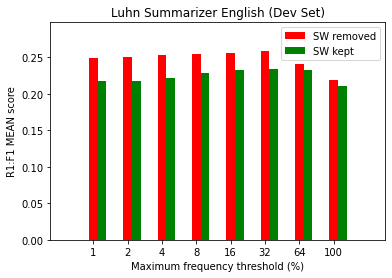

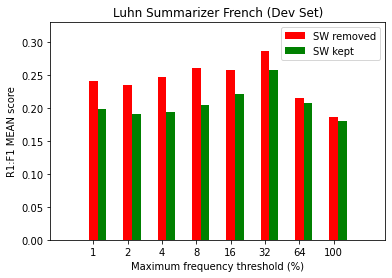

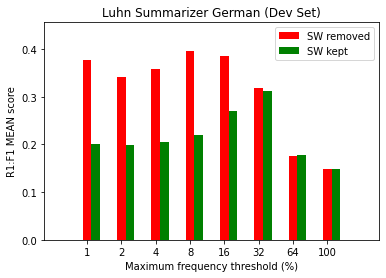

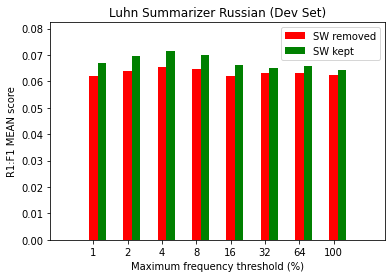

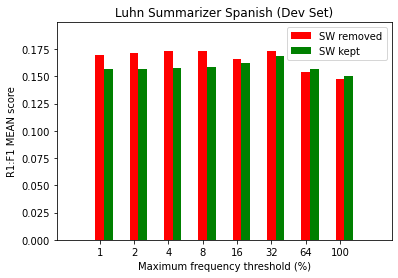

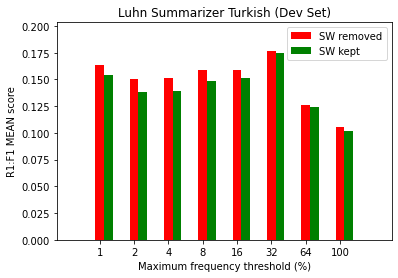

In [89]:
# Dev sets
make_luhn_plot(english_rouge_scores, 'english', 'dev')
make_luhn_plot(french_rouge_scores, 'french', 'dev')
make_luhn_plot(german_rouge_scores, 'german', 'dev')
make_luhn_plot(russian_rouge_scores, 'russian', 'dev')
make_luhn_plot(spanish_rouge_scores, 'spanish', 'dev')
make_luhn_plot(turkish_rouge_scores, 'turkish', 'dev')

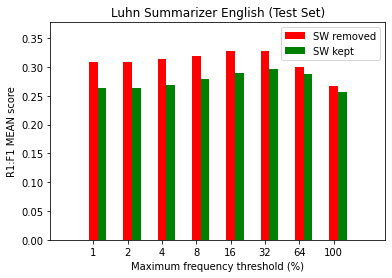

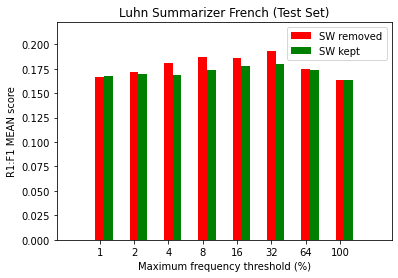

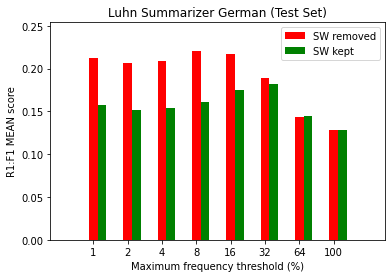

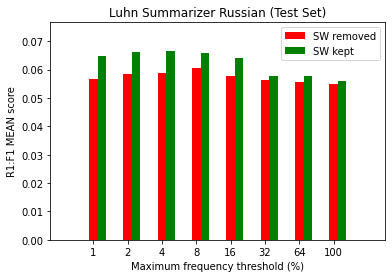

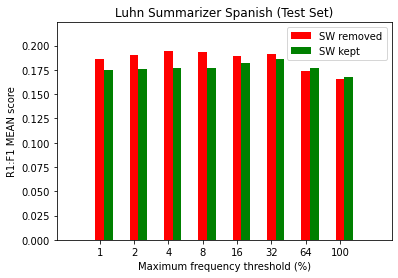

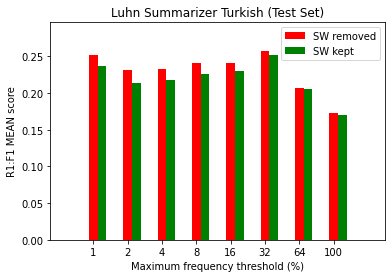

In [92]:
# Test sets
make_luhn_plot(english_rouge_test_scores, 'english', 'test')
make_luhn_plot(french_rouge_test_scores, 'french', 'test')
make_luhn_plot(german_rouge_test_scores, 'german', 'test')
make_luhn_plot(russian_rouge_test_scores, 'russian', 'test')
make_luhn_plot(spanish_rouge_test_scores, 'spanish', 'test')
make_luhn_plot(turkish_rouge_test_scores, 'turkish', 'test')

### Optimal threshold by language

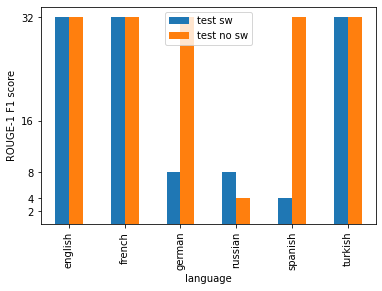

In [100]:


columns = ['language', 'dev sw', 'dev no sw', 'test sw', 'test no sw']
thresholds = [
    ['english', 32, 32, 32, 32],
    ['french', 32, 32, 32, 32],
    ['german', 8, 32, 8, 32],
    ['russian', 8, 4, 8, 4],
    ['spanish', 4, 32, 4, 32],
    ['turkish', 32, 32, 32, 32],
]
df = pd.DataFrame(thresholds, columns=columns)

ax = df.plot(x='language', y=['test sw', 'test no sw'], kind='bar')
ax.set_ylabel('ROUGE-1 F1 score')
ax.set_yticks([2, 4, 8, 16, 32])
plt.show()

#